# HSV 色彩空间可视化与算法测试

本notebook用于测试和可视化HSV色彩空间相关算法

## 1. 导入必要的库

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import colorsys

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

print("库导入成功！")
print(f"OpenCV 版本: {cv2.__version__}")
print(f"NumPy 版本: {np.__version__}")

库导入成功！
OpenCV 版本: 4.13.0
NumPy 版本: 2.2.5


## 2. RGB 与 HSV 转换基础 及 hsv可视化

纯红色:
RGB: (255, 0, 0)
HSV: H=0.0°, S=1.000, V=1.000
说明: H(色调)范围0-360°, S(饱和度)范围0.0-1.0, V(明度)范围0.0-1.0
      S值越高颜色越纯，V=0.0为黑色，V=1.0为白色


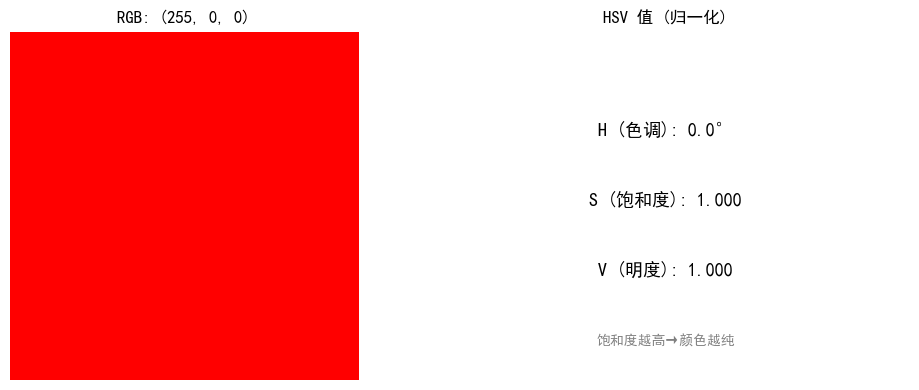

In [2]:
# 创建一个简单的RGB颜色并转换为HSV
def rgb_to_hsv_demo(r, g, b):
    """演示RGB到HSV的转换（使用归一化值）"""
    # 使用 colorsys 进行转换（归一化的 RGB 和 HSV）
    h, s, v = colorsys.rgb_to_hsv(r/255.0, g/255.0, b/255.0)
    h_deg = h * 360  # 转换为角度
    
    print(f"RGB: ({r}, {g}, {b})")
    print(f"HSV: H={h_deg:.1f}°, S={s:.3f}, V={v:.3f}")
    print(f"说明: H(色调)范围0-360°, S(饱和度)范围0.0-1.0, V(明度)范围0.0-1.0")
    print(f"      S值越高颜色越纯，V=0.0为黑色，V=1.0为白色")
    
    # 可视化
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    # RGB颜色块
    rgb_display = np.ones((100, 100, 3), dtype=np.uint8)
    rgb_display[:, :] = [r, g, b]
    axes[0].imshow(rgb_display)
    axes[0].set_title(f'RGB: ({r}, {g}, {b})')
    axes[0].axis('off')
    
    # HSV信息
    axes[1].text(0.5, 0.7, f'H (色调): {h_deg:.1f}°', ha='center', fontsize=13)
    axes[1].text(0.5, 0.5, f'S (饱和度): {s:.3f}', ha='center', fontsize=13)
    axes[1].text(0.5, 0.3, f'V (明度): {v:.3f}', ha='center', fontsize=13)
    axes[1].text(0.5, 0.1, f'饱和度越高→颜色越纯', ha='center', fontsize=10, style='italic', color='gray')
    axes[1].set_title('HSV 值 (归一化)')
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()

# 测试几个颜色
print("纯红色:")
rgb_to_hsv_demo(255, 0, 0)

### 可视化 HSV 色彩空间 (圆锥体)

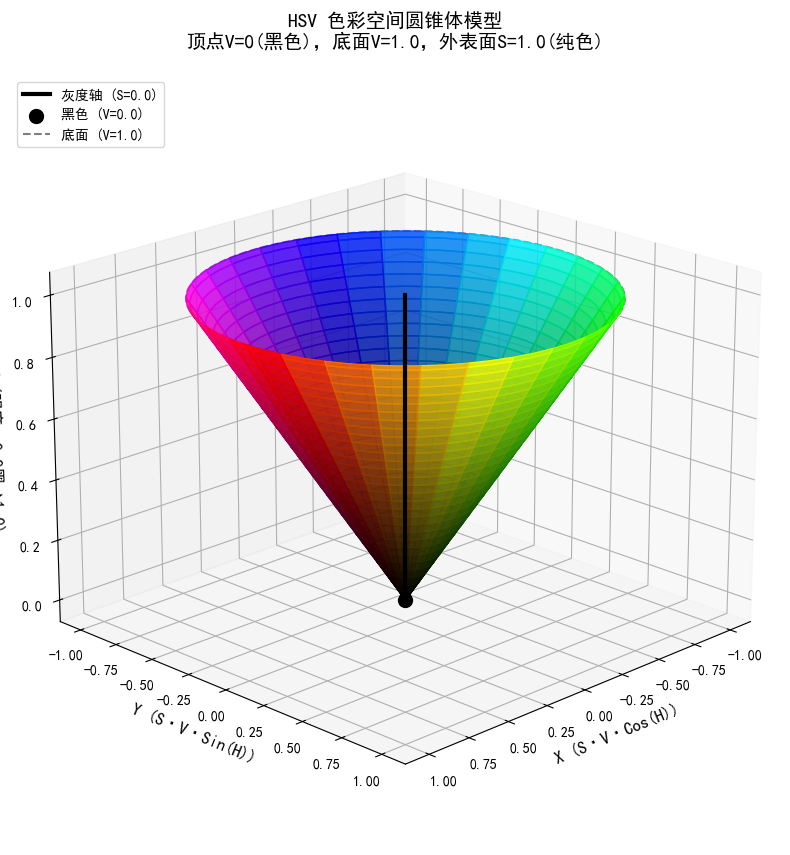

In [3]:
def visualize_hsv_cone():
    """可视化HSV色彩空间圆锥体（标准圆锥模型）"""
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # 生成圆锥体坐标
    n_points = 60
    theta = np.linspace(0, 2*np.pi, n_points)
    v = np.linspace(0, 1, n_points)  # V: 0.0(黑，顶点) - 1.0(底面)
    Theta, V = np.meshgrid(theta, v)
    
    # 圆锥外表面 (饱和度 = 1.0, 颜色最纯)
    # 半径随明度线性增加：R = V (V=0时为点，V=1时为最大半径)
    R = V
    X_outer = R * np.cos(Theta)
    Y_outer = R * np.sin(Theta)
    
    # 为每个点计算颜色
    colors = np.zeros((n_points, n_points, 3))
    for i in range(n_points):
        for j in range(n_points):
            h = Theta[i, j] / (2 * np.pi)  # H归一化到 [0, 1]
            s = 1.0  # 外层饱和度为1.0（颜色最纯）
            v_val = V[i, j]  # V: 0.0-1.0   
            if v_val > 0.01:  # 避免在顶点处出现数值问题
                r, g, b = colorsys.hsv_to_rgb(h, s, v_val)
            else:
                r, g, b = 0, 0, 0  # 顶点为黑色
            colors[i, j] = [r, g, b]
    
    # 绘制圆锥外表面
    ax.plot_surface(X_outer, Y_outer, V, facecolors=colors, shade=False, alpha=0.85)
    
    # 绘制中心轴 (饱和度 = 0.0, 灰度轴：从黑到白)
    z_axis = np.linspace(0, 1, 100)
    x_axis = np.zeros_like(z_axis)
    y_axis = np.zeros_like(z_axis)
    ax.plot(x_axis, y_axis, z_axis, 'k-', linewidth=3, label='灰度轴 (S=0.0)', zorder=10)
    
    # 标注关键点
    ax.scatter([0], [0], [0], color='black', s=100, label='黑色 (V=0.0)', zorder=11)
    
    # 绘制底部圆形（V=1.0，显示所有色调）
    theta_circle = np.linspace(0, 2*np.pi, 100)
    x_circle = np.cos(theta_circle)
    y_circle = np.sin(theta_circle)
    z_circle = np.ones_like(theta_circle)
    ax.plot(x_circle, y_circle, z_circle, 'k--', linewidth=1.5, alpha=0.5, label='底面 (V=1.0)')
    
    ax.set_xlabel('X (S·V·Cos(H))', fontsize=12)
    ax.set_ylabel('Y (S·V·Sin(H))', fontsize=12)
    ax.set_zlabel('V (明度: 0.0黑→1.0)', fontsize=12)
    ax.set_title('HSV 色彩空间圆锥体模型\n顶点V=0(黑色)，底面V=1.0，外表面S=1.0(纯色)', fontsize=14, pad=20)
    ax.legend(loc='upper left')
    
    # 设置视角
    ax.view_init(elev=20, azim=45)
    
    plt.show()

visualize_hsv_cone()

### HSV 色调 (Hue) 色轮可视化

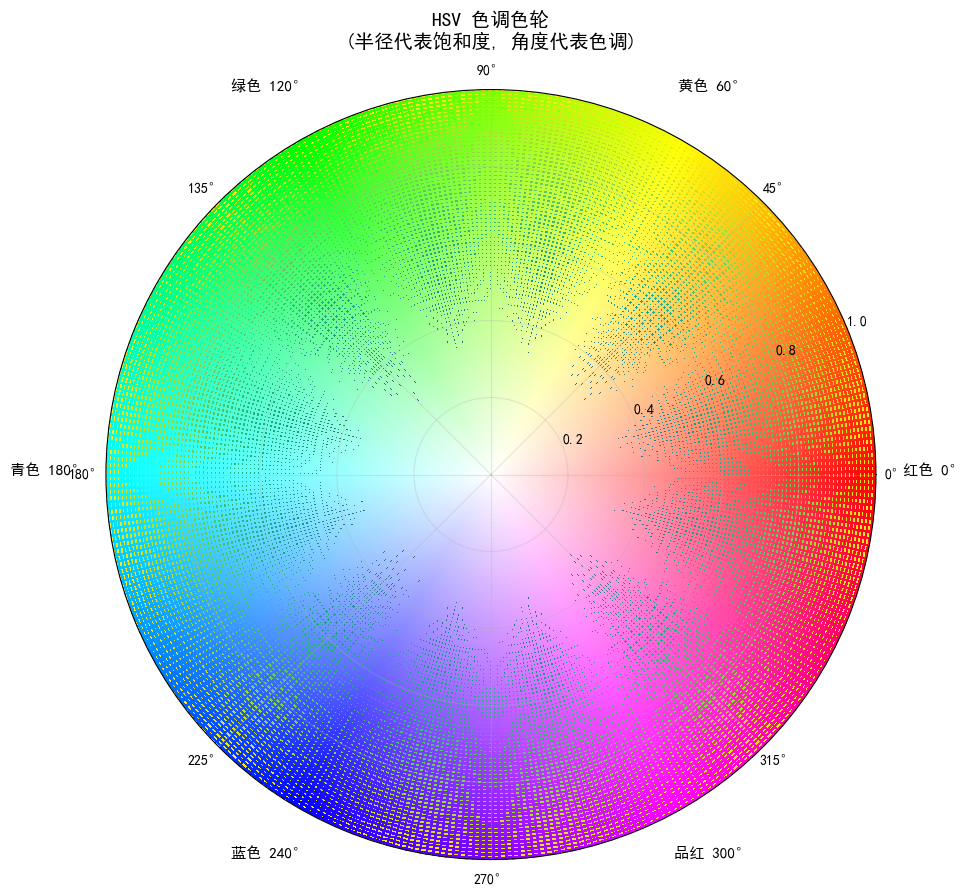

In [4]:
def plot_hue_wheel():
    """绘制HSV色调色轮"""
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    
    # 生成色轮数据
    n = 360
    theta = np.linspace(0, 2*np.pi, n)
    radii = np.linspace(0, 1, 100)
    
    Theta, Radii = np.meshgrid(theta, radii)
    
    # 创建颜色映射
    colors = np.zeros((len(radii), len(theta), 3))
    for i, r in enumerate(radii):
        for j, t in enumerate(theta):
            h = t / (2 * np.pi)
            s = r  # 饱和度随半径增加
            v = 1.0  # 固定明度
            colors[i, j] = colorsys.hsv_to_rgb(h, s, v)
    
    # 绘制色轮
    ax.pcolormesh(Theta, Radii, Radii, color=colors.reshape(-1, 3), shading='auto')
    
    # 标注主要颜色
    color_labels = [
        (0, '红色 0°'),
        (60, '黄色 60°'),
        (120, '绿色 120°'),
        (180, '青色 180°'),
        (240, '蓝色 240°'),
        (300, '品红 300°')
    ]
    
    for angle, label in color_labels:
        rad = np.radians(angle)
        ax.text(rad, 1.15, label, ha='center', fontsize=11, fontweight='bold')
    
    ax.set_ylim(0, 1)
    ax.set_title('HSV 色调色轮\n(半径代表饱和度, 角度代表色调)', 
                 fontsize=14, pad=30)
    ax.grid(True, alpha=0.3)
    
    plt.show()

plot_hue_wheel()

## 3. 图像颜色分割示例

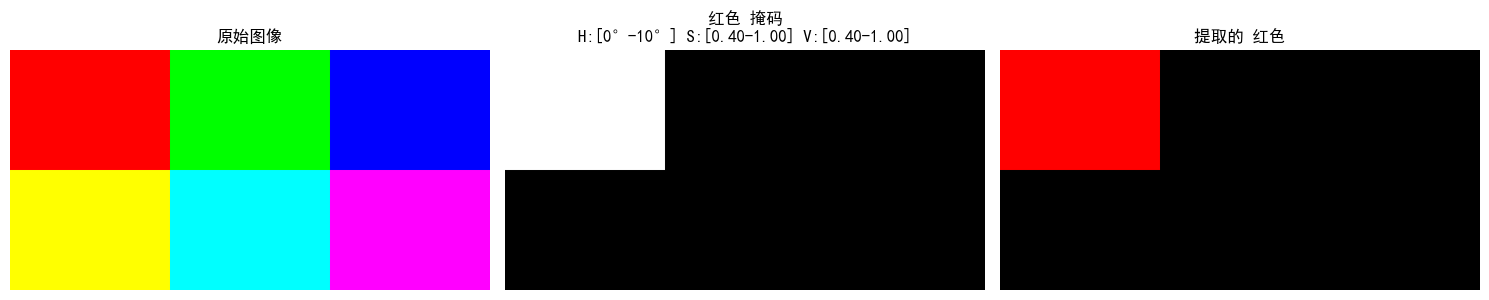

In [5]:
def create_test_image():
    """创建一个测试图像，包含多种颜色"""
    img = np.zeros((300, 600, 3), dtype=np.uint8)
    
    # 红色区域
    img[0:150, 0:200] = [0, 0, 255]
    # 绿色区域
    img[0:150, 200:400] = [0, 255, 0]
    # 蓝色区域
    img[0:150, 400:600] = [255, 0, 0]
    # 黄色区域
    img[150:300, 0:200] = [0, 255, 255]
    # 青色区域
    img[150:300, 200:400] = [255, 255, 0]
    # 品红区域
    img[150:300, 400:600] = [255, 0, 255]
    
    return img

def segment_color_by_hsv_normalized(img, lower_h, upper_h, lower_s=0.4, upper_s=1.0, lower_v=0.4, upper_v=1.0, color_name=''):
    """
    根据归一化的HSV范围分割颜色
    参数:
        img: 输入图像(BGR格式)
        lower_h, upper_h: 色调范围 (0-360度)
        lower_s, upper_s: 饱和度范围 (0.0-1.0)
        lower_v, upper_v: 明度范围 (0.0-1.0)
        color_name: 颜色名称
    """
    # 转换为HSV（OpenCV格式：H=0-179, S=0-255, V=0-255）
    hsv_cv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # 将归一化值转换为OpenCV格式
    lower_hsv_cv = np.array([lower_h/2, lower_s*255, lower_v*255])
    upper_hsv_cv = np.array([upper_h/2, upper_s*255, upper_v*255])
    
    mask = cv2.inRange(hsv_cv, lower_hsv_cv, upper_hsv_cv)
    result = cv2.bitwise_and(img, img, mask=mask)
    
    # 显示结果
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0].set_title('原始图像')
    axes[0].axis('off')
    
    axes[1].imshow(mask, cmap='gray')
    axes[1].set_title(f'{color_name} 掩码\nH:[{lower_h:.0f}°-{upper_h:.0f}°] S:[{lower_s:.2f}-{upper_s:.2f}] V:[{lower_v:.2f}-{upper_v:.2f}]')
    axes[1].axis('off')
    
    axes[2].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    axes[2].set_title(f'提取的 {color_name}')
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()

# 创建测试图像
test_img = create_test_image()

# 提取红色 (H: 0-10度, S: 0.4-1.0, V: 0.4-1.0)
segment_color_by_hsv_normalized(test_img, lower_h=0, upper_h=10, 
                                lower_s=0.4, upper_s=1.0, 
                                lower_v=0.4, upper_v=1.0, 
                                color_name='红色')

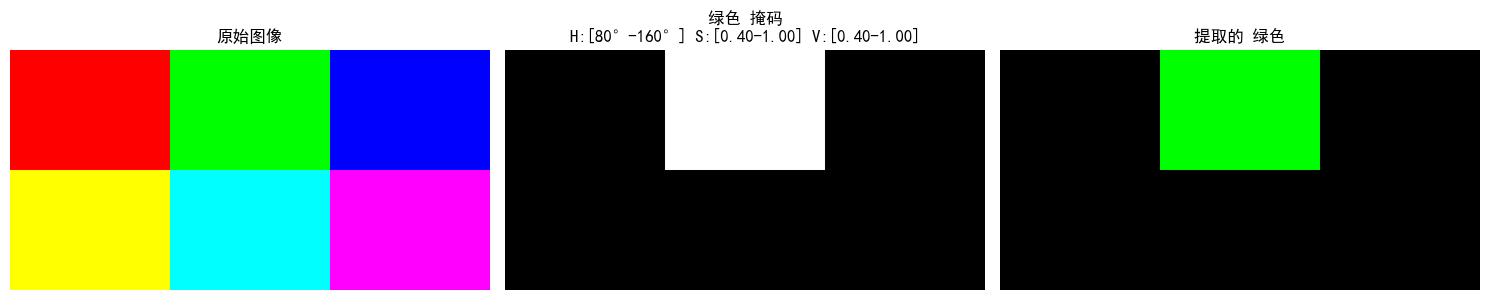

In [6]:
# 提取绿色 (H: 80-160度, S: 0.4-1.0, V: 0.4-1.0)
segment_color_by_hsv_normalized(test_img, lower_h=80, upper_h=160, 
                                lower_s=0.4, upper_s=1.0, 
                                lower_v=0.4, upper_v=1.0, 
                                color_name='绿色')

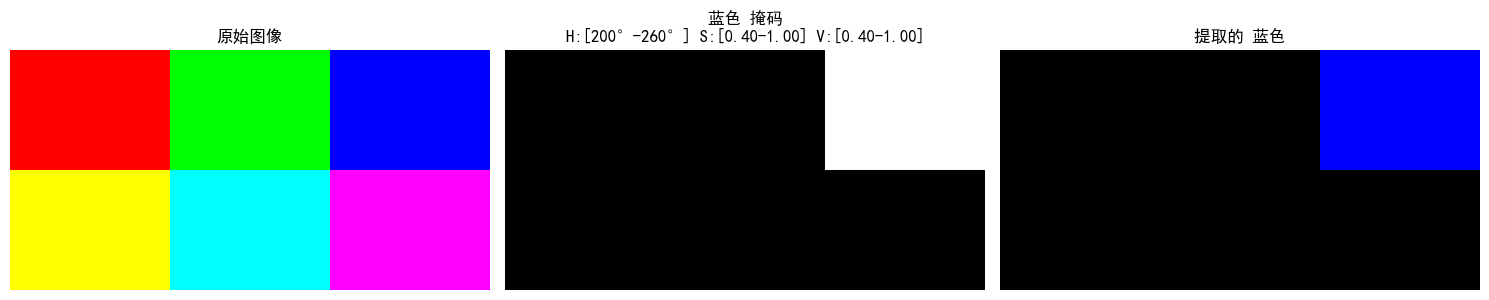

In [7]:
# 提取蓝色 (H: 200-260度, S: 0.4-1.0, V: 0.4-1.0)
segment_color_by_hsv_normalized(test_img, lower_h=200, upper_h=260, 
                                lower_s=0.4, upper_s=1.0, 
                                lower_v=0.4, upper_v=1.0, 
                                color_name='蓝色')

## 4. 自定义测试区域 - 上传图片并提取色块

### 步骤1: 从本地文件加载图片

In [8]:
# 方法1: 从文件路径加载图片
def load_image_from_path(image_path):
    """
    从文件路径加载图片
    参数:
        image_path: 图片的完整路径（支持 jpg, png, bmp 等格式）
    返回:
        img: BGR格式的图片数组
    """
    img = cv2.imread(image_path)
    if img is None:
        print(f"错误：无法加载图片 {image_path}")
        print("请检查:")
        print("1. 文件路径是否正确")
        print("2. 文件是否存在")
        print("3. 文件格式是否支持（jpg, png, bmp等）")
        return None
    
    print(f"图片加载成功！")
    print(f"图片尺寸: {img.shape[1]} x {img.shape[0]} pixels")
    print(f"颜色通道: {img.shape[2]}")
    
    # 显示原图
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('加载的图片')
    plt.axis('off')
    plt.show()
    
    return img
# 使用示例：
# my_img = load_image_from_path(r"D:\path\to\your\image.jpg")


# 方法2: 使用文件选择器上传图片
from tkinter import Tk, filedialog
import os

def select_and_load_image():
    """
    打开文件选择对话框，让用户选择图片文件
    返回:
        img: BGR格式的图片数组
    """
    # 创建一个隐藏的 Tk 窗口
    root = Tk()
    root.withdraw()  # 隐藏主窗口
    root.attributes('-topmost', True)  # 将对话框置于最前面
    
    # 打开文件选择对话框
    print("请在弹出的窗口中选择图片文件...")
    file_path = filedialog.askopenfilename(
        title="选择图片文件",
        filetypes=[
            ("图片文件", "*.jpg *.jpeg *.png *.bmp *.tiff *.webp"),
            ("所有文件", "*.*")
        ]
    )
    
    root.destroy()  # 关闭 Tk 窗口
    
    if not file_path:
        print("未选择文件")
        return None
    
    print(f"选择的文件: {file_path}")
    return load_image_from_path(file_path)

请在弹出的窗口中选择图片文件...
选择的文件: C:/Users/86178/Desktop/oilpaintingLib/365.jpg
图片加载成功！
图片尺寸: 1206 x 838 pixels
颜色通道: 3
选择的文件: C:/Users/86178/Desktop/oilpaintingLib/365.jpg
图片加载成功！
图片尺寸: 1206 x 838 pixels
颜色通道: 3


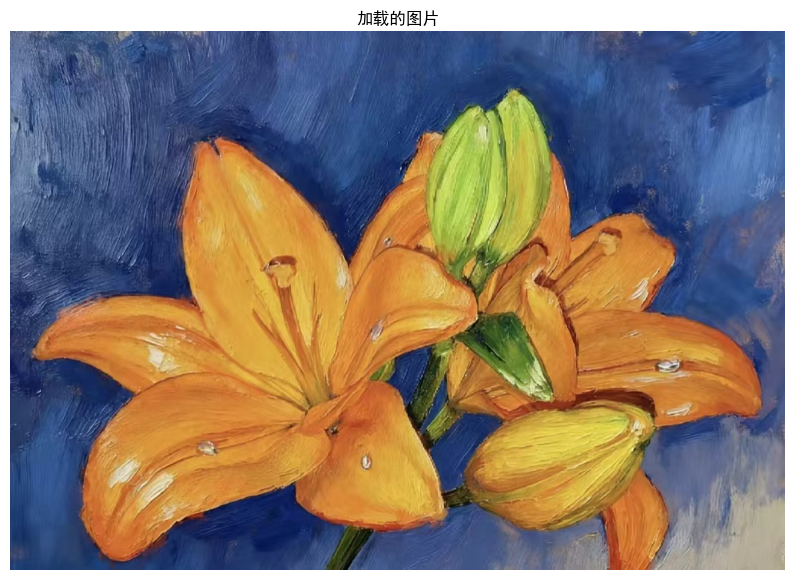

In [9]:
# 选择一种方法加载图片：

# 方法1: 直接指定文件路径（推荐用于重复测试）
# my_img = load_image_from_path(r"D:\your\image\path\here.jpg")

# 方法2: 使用文件选择器
my_img = select_and_load_image()

### 步骤2: 提取指定颜色的色块

调整 HSV 参数来提取你想要的颜色：
- **H (色调)**: 0-360° - 选择颜色类型
  - 红色: 0-10° 或 350-360°
  - 黄色: 40-70°
  - 绿色: 80-160°
  - 青色: 170-200°
  - 蓝色: 200-260°
  - 品红/紫色: 280-330°
  
- **S (饱和度)**: 0.0-1.0 - 值越高颜色越纯
  - 高饱和度 (0.6-1.0): 鲜艳的颜色
  - 低饱和度 (0.0-0.3): 接近灰色
  
- **V (明度)**: 0.0-1.0 - 0.0为黑色，1.0为最亮
  - 亮色 (0.6-1.0)
  - 暗色 (0.0-0.4)

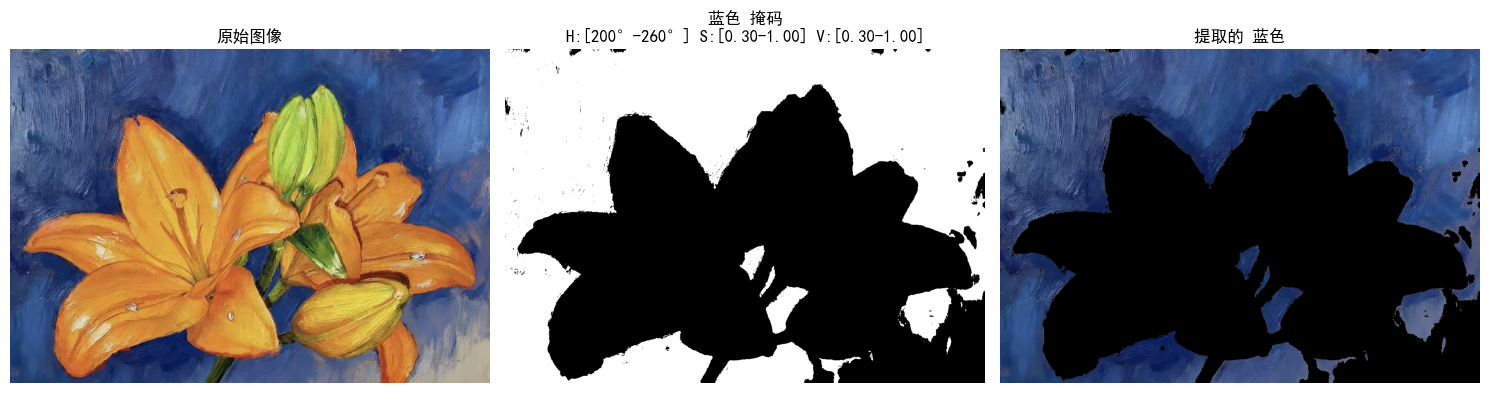

In [10]:
# 确保图片已加载
if 'my_img' in locals() and my_img is not None:
    # 提取指定颜色 - 根据需要修改参数
    segment_color_by_hsv_normalized(
        my_img, 
        lower_h=200,      # 色调下限 (0-360度)
        upper_h=260,     # 色调上限 (0-360度)
        lower_s=0.3,    # 饱和度下限 (0.0-1.0)
        upper_s=1.0,    # 饱和度上限 (0.0-1.0)
        lower_v=0.3,    # 明度下限 (0.0-1.0)
        upper_v=1.0,    # 明度上限 (0.0-1.0)
        color_name='蓝色'  # 颜色名称（用于显示）
    )
else:
    print("请先在上面的单元格中加载图片！")

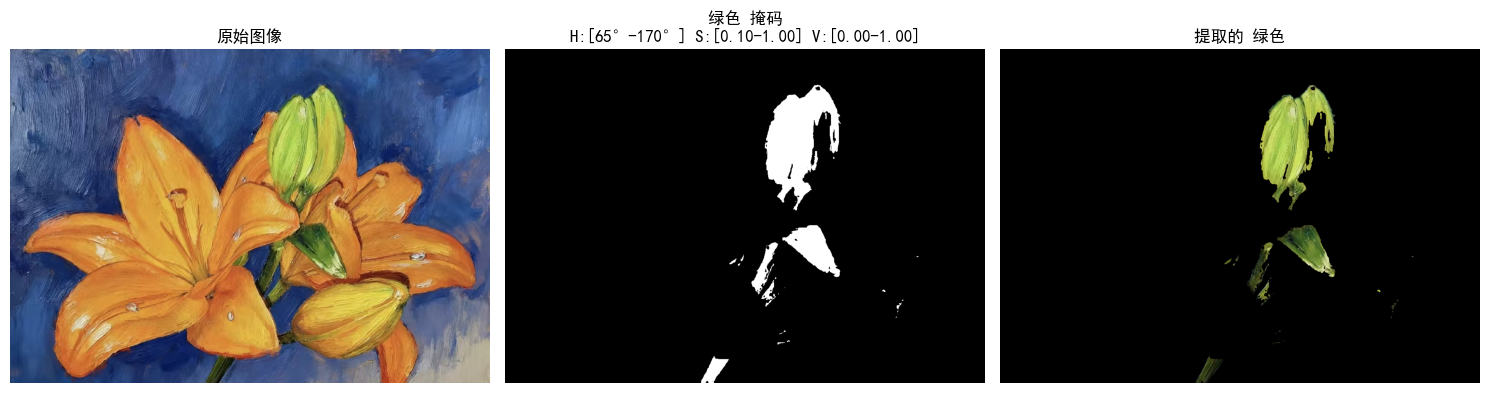

In [11]:
# 提取第二种颜色
if 'my_img' in locals() and my_img is not None:
    segment_color_by_hsv_normalized(
        my_img, 
        lower_h=65,     # 绿色范围
        upper_h=170, 
        lower_s=0.1, 
        upper_s=1.0, 
        lower_v=0.0, 
        upper_v=1.0, 
        color_name='绿色'
    )
else:
    print("请先加载图片！")

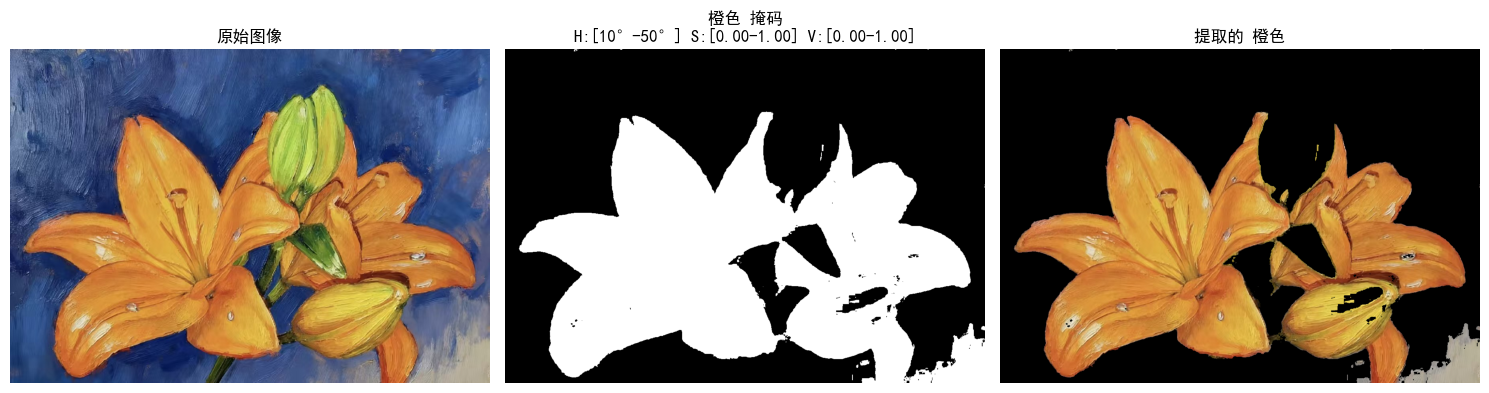

In [12]:
# 提取第三种颜色
if 'my_img' in locals() and my_img is not None:
    segment_color_by_hsv_normalized(
        my_img, 
        lower_h=10,     # 橙色范围
        upper_h=50, 
        lower_s=0.0, 
        upper_s=1.0, 
        lower_v=0.0, 
        upper_v=1.0, 
        color_name='橙色'
    )
else:
    print("请先加载图片！")

### 步骤3: 分析图片的色相分布

In [13]:
def analyze_hue_distribution(img, min_saturation=0.1, min_value=0.1):
    """
    分析图片中色相的分布情况
    
    参数:
        img: 输入图像(BGR格式)
        min_saturation: 最小饱和度阈值(0.0-1.0)，低于此值的像素会被忽略（灰色像素）
        min_value: 最小明度阈值(0.0-1.0)，低于此值的像素会被忽略（太暗的像素）
    """
    if img is None:
        print("错误：图片未加载！")
        return
    
    print("正在分析图片的色相分布，请稍候...")
    
    # 转换为HSV
    hsv_cv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h_cv, s_cv, v_cv = cv2.split(hsv_cv)
    
    # 转换为归一化值
    h = h_cv * 2  # 0-360度
    s = s_cv / 255.0  # 0.0-1.0
    v = v_cv / 255.0  # 0.0-1.0
    
    # 过滤掉低饱和度和低明度的像素（灰色和黑色像素不参与统计）
    valid_mask = (s >= min_saturation) & (v >= min_value)
    valid_hues = h[valid_mask]
    
    total_pixels = img.shape[0] * img.shape[1]
    valid_pixels = len(valid_hues)
    ignored_pixels = total_pixels - valid_pixels
    
    print(f"\n图片信息:")
    print(f"总像素数: {total_pixels:,}")
    print(f"有效彩色像素: {valid_pixels:,} ({valid_pixels/total_pixels*100:.1f}%)")
    print(f"忽略像素(灰色/黑色): {ignored_pixels:,} ({ignored_pixels/total_pixels*100:.1f}%)")
    print(f"过滤条件: S >= {min_saturation:.2f}, V >= {min_value:.2f}\n")
    
    if valid_pixels == 0:
        print("警告：没有找到有效的彩色像素！请降低 min_saturation 或 min_value 参数。")
        return
    
    # 创建图表
    fig = plt.figure(figsize=(16, 10))
    gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)
    
    # 1. 色相直方图（数量）
    ax1 = fig.add_subplot(gs[0, :])
    bins = np.arange(0, 361, 5)  # 每5度一个bin
    counts, bin_edges = np.histogram(valid_hues, bins=bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # 为每个柱子着色
    colors_for_bars = []
    for hue in bin_centers:
        r, g, b = colorsys.hsv_to_rgb(hue/360, 1.0, 1.0)
        colors_for_bars.append((r, g, b))
    
    ax1.bar(bin_centers, counts, width=5, color=colors_for_bars, edgecolor='black', linewidth=0.5)
    ax1.set_xlabel('色相 (H) - 度', fontsize=12)
    ax1.set_ylabel('像素数量', fontsize=12)
    ax1.set_title(f'色相分布直方图 (有效像素: {valid_pixels:,})', fontsize=14, fontweight='bold')
    ax1.set_xlim(0, 360)
    ax1.grid(axis='y', alpha=0.3)
    
    # 标注主要颜色范围
    color_ranges = [
        (0, 10, '红', 'red'),
        (10, 40, '橙', 'orange'),
        (40, 70, '黄', 'yellow'),
        (70, 160, '绿', 'green'),
        (160, 200, '青', 'cyan'),
        (200, 260, '蓝', 'blue'),
        (260, 330, '紫', 'purple'),
        (330, 360, '红', 'red')
    ]
    for start, end, name, color in color_ranges:
        ax1.axvspan(start, end, alpha=0.1, color=color)
        ax1.text((start+end)/2, ax1.get_ylim()[1]*0.95, name, 
                ha='center', fontsize=9, fontweight='bold')
    
    # 2. 色相密度分布（归一化）
    ax2 = fig.add_subplot(gs[1, :])
    density, _ = np.histogram(valid_hues, bins=bins, density=True)
    ax2.fill_between(bin_centers, density, color='skyblue', alpha=0.6, edgecolor='navy', linewidth=1.5)
    ax2.plot(bin_centers, density, color='navy', linewidth=2)
    ax2.set_xlabel('色相 (H) - 度', fontsize=12)
    ax2.set_ylabel('密度', fontsize=12)
    ax2.set_title('色相密度分布曲线', fontsize=14, fontweight='bold')
    ax2.set_xlim(0, 360)
    ax2.grid(alpha=0.3)
    
    # 3. 主要色相统计（饼图）
    ax3 = fig.add_subplot(gs[2, 0])
    
    # 按颜色范围分组统计
    hue_groups = {
        '红色 (0-10°)': ((valid_hues >= 0) & (valid_hues <= 10)).sum(),
        '橙色 (10-40°)': ((valid_hues > 10) & (valid_hues <= 40)).sum(),
        '黄色 (40-70°)': ((valid_hues > 40) & (valid_hues <= 70)).sum(),
        '绿色 (70-160°)': ((valid_hues > 70) & (valid_hues <= 160)).sum(),
        '青色 (160-200°)': ((valid_hues > 160) & (valid_hues <= 200)).sum(),
        '蓝色 (200-260°)': ((valid_hues > 200) & (valid_hues <= 260)).sum(),
        '紫色 (260-330°)': ((valid_hues > 260) & (valid_hues <= 330)).sum(),
        '红色 (330-360°)': ((valid_hues > 330) & (valid_hues <= 360)).sum(),
    }
    
    # 合并红色范围
    red_total = hue_groups['红色 (0-10°)'] + hue_groups['红色 (330-360°)']
    hue_groups['红色 (0-10°, 330-360°)'] = red_total
    del hue_groups['红色 (0-10°)']
    del hue_groups['红色 (330-360°)']
    
    # 过滤掉占比小于1%的颜色
    filtered_groups = {k: v for k, v in hue_groups.items() if v > valid_pixels * 0.01}
    if len(filtered_groups) < len(hue_groups):
        other_count = sum(v for k, v in hue_groups.items() if k not in filtered_groups)
        if other_count > 0:
            filtered_groups['其他 (<1%)'] = other_count
    
    colors_pie = ['#FF0000', '#FF8800', '#FFFF00', '#00FF00', '#00FFFF', '#0088FF', '#8800FF', '#CCCCCC']
    
    wedges, texts, autotexts = ax3.pie(
        filtered_groups.values(), 
        labels=filtered_groups.keys(),
        colors=colors_pie[:len(filtered_groups)],
        autopct='%1.1f%%',
        startangle=90
    )
    for text in texts:
        text.set_fontsize(9)
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(9)
    
    ax3.set_title('主要颜色占比', fontsize=12, fontweight='bold')
    
    # 4. 详细统计表
    ax4 = fig.add_subplot(gs[2, 1])
    ax4.axis('off')
    
    # 创建统计表格
    table_data = []
    table_data.append(['颜色范围', '像素数', '占比', '面积'])
    
    sorted_groups = sorted(hue_groups.items(), key=lambda x: x[1], reverse=True)
    for name, count in sorted_groups:
        percentage = count / valid_pixels * 100
        if percentage >= 0.1:  # 只显示占比>=0.1%的
            table_data.append([
                name.split('(')[0].strip(),
                f'{count:,}',
                f'{percentage:.2f}%',
                f'{count/total_pixels*100:.2f}%'
            ])
    
    table = ax4.table(cellText=table_data, cellLoc='left', loc='center',
                     colWidths=[0.35, 0.25, 0.2, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 2)
    
    # 设置表头样式
    for i in range(4):
        table[(0, i)].set_facecolor('#4CAF50')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    # 交替行颜色
    for i in range(1, len(table_data)):
        for j in range(4):
            if i % 2 == 0:
                table[(i, j)].set_facecolor('#F0F0F0')
    
    ax4.set_title('色相统计详情', fontsize=12, fontweight='bold', pad=20)
    
    plt.suptitle(f'图片色相分布分析\n(已过滤: S<{min_saturation:.2f} 或 V<{min_value:.2f} 的像素)', 
                 fontsize=16, fontweight='bold', y=0.98)
    
    plt.show()
    
    # 打印 Top 5 色相峰值
    print("\n色相分布峰值 (Top 5):")
    peak_indices = np.argsort(counts)[-5:][::-1]
    for i, idx in enumerate(peak_indices, 1):
        hue_range = f"{bin_edges[idx]:.0f}-{bin_edges[idx+1]:.0f}"
        print(f"{i}. 色相 {hue_range}°: {counts[idx]:,} 像素 ({counts[idx]/valid_pixels*100:.2f}%)")

# 使用示例（需要先加载图片）
# analyze_hue_distribution(my_img, min_saturation=0.1, min_value=0.1)

正在分析图片的色相分布，请稍候...

图片信息:
总像素数: 1,010,628
有效彩色像素: 994,622 (98.4%)
忽略像素(灰色/黑色): 16,006 (1.6%)
过滤条件: S >= 0.10, V >= 0.10



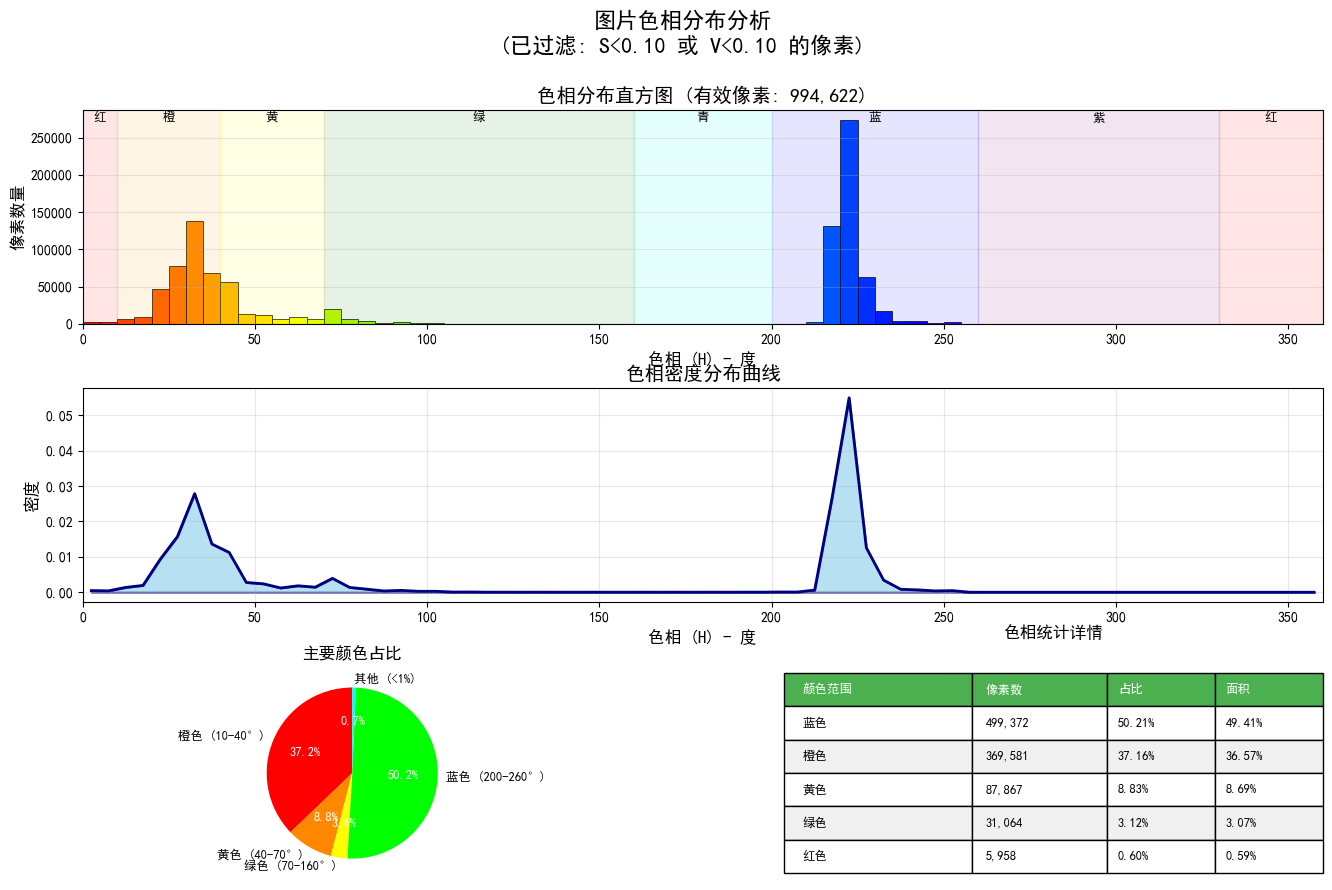


色相分布峰值 (Top 5):
1. 色相 220-225°: 273,422 像素 (27.49%)
2. 色相 30-35°: 138,666 像素 (13.94%)
3. 色相 215-220°: 131,211 像素 (13.19%)
4. 色相 25-30°: 78,275 像素 (7.87%)
5. 色相 35-40°: 67,795 像素 (6.82%)


In [14]:
# 分析已加载图片的色相分布
if 'my_img' in locals() and my_img is not None:
    # 参数说明：
    # min_saturation: 最小饱和度(0.0-1.0)，低于此值的像素被视为灰色，不参与统计
    # min_value: 最小明度(0.0-1.0)，低于此值的像素被视为太暗，不参与统计
    
    analyze_hue_distribution(my_img, min_saturation=0.1, min_value=0.1)
else:
    print("请先加载图片！")

### 步骤4: 基于波峰的自动色块划分（无主观色域）

将色相直方图平滑后检测显著波峰，并以峰间“谷底”作为边界自动划分色块；结果按像素比例降序排列，可通过 min_ratio 设置最小呈现阈值（小于该占比的色块将被忽略）。

In [15]:
import numpy as np
import cv2
import colorsys

def detect_hue_blocks(img, min_saturation=0.1, min_value=0.1,
                      bin_size_deg=2, smooth_sigma_deg=6,
                      min_prominence_ratio=0.05,
                      coverage_mode='valley',
                      min_ratio=0.05):
    """
    基于色相直方图的波峰自动检测与色块划分（避免主观色域划分）

    参数:
        img: 输入图像 (BGR)
        min_saturation: 忽略低饱和度像素 (灰度)
        min_value: 忽略低明度像素 (太暗)
        bin_size_deg: 直方图的角度分辨率（度）
        smooth_sigma_deg: 平滑的高斯核标准差（度）
        min_prominence_ratio: 峰值显著性阈值（相对最大密度），过滤微弱峰
        coverage_mode: 边界确定方式，'valley' 使用峰间谷底作为边界（更能覆盖整个正态分布）
        min_ratio: 最小呈现阈值（像素占有效彩色像素比例，<该值的色块会被忽略），例如0.05=5%

    返回:
        result: dict 包含
            - bins_deg: 每个bin的中心角度（度）
            - hist_counts: 原始数量直方图
            - smooth_density: 平滑后的密度曲线
            - peaks: list[dict] 每个峰的信息 {idx, hue_deg, height, left_idx, right_idx}
            - blocks: list[dict] 每个色块 {start_deg, end_deg, center_deg, pixel_count, percentage}
    """
    if img is None:
        raise ValueError('图片未加载')

    # HSV转换与有效像素筛选
    hsv_cv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h_cv, s_cv, v_cv = cv2.split(hsv_cv)
    h = h_cv.astype(np.float32) * 2.0            # 0-360°
    s = s_cv.astype(np.float32) / 255.0          # 0.0-1.0
    v = v_cv.astype(np.float32) / 255.0          # 0.0-1.0
    valid_mask = (s >= min_saturation) & (v >= min_value)
    valid_hues = h[valid_mask]

    if valid_hues.size == 0:
        raise ValueError('没有有效彩色像素，请降低 min_saturation/min_value')

    # 构建直方图（数量与密度）
    edges = np.arange(0, 360 + bin_size_deg, bin_size_deg, dtype=np.float32)
    counts, edges = np.histogram(valid_hues, bins=edges)
    centers = (edges[:-1] + edges[1:]) / 2.0
    density = counts.astype(np.float32) / valid_hues.size

    # 环形平滑（高斯卷积，考虑360°环绕）
    sigma_bins = max(1, int(round(smooth_sigma_deg / bin_size_deg)))
    k_radius = max(1, 3 * sigma_bins)  # ~3σ
    x = np.arange(-k_radius, k_radius + 1, dtype=np.float32)
    gauss = np.exp(-(x**2) / (2.0 * sigma_bins**2))
    gauss /= gauss.sum()
    dens_ext = np.concatenate([density, density, density])
    smooth_ext = np.convolve(dens_ext, gauss, mode='same')
    smooth = smooth_ext[density.size:2*density.size]

    # 辅助函数：局部峰与谷检测
    def find_local_extrema(arr):
        maxima = []
        minima = []
        n = arr.size
        for i in range(n):
            prev = arr[(i - 1) % n]
            curr = arr[i]
            nextv = arr[(i + 1) % n]
            if curr > prev and curr > nextv:
                maxima.append(i)
            if curr < prev and curr < nextv:
                minima.append(i)
        return maxima, minima

    peaks_idx, mins_idx = find_local_extrema(smooth)
    if len(peaks_idx) == 0:
        peaks_idx = [int(np.argmax(smooth))]
        mins_idx = []

    # 峰显著性筛选（相对最大高度）
    max_height = float(np.max(smooth))
    min_prom = max_height * float(min_prominence_ratio)
    peaks_idx = [i for i in peaks_idx if smooth[i] >= min_prom]
    if len(peaks_idx) == 0:
        peaks_idx = [int(np.argmax(smooth))]

    # 计算峰间谷底作为边界（环形）
    peaks_idx_sorted = sorted(peaks_idx)
    blocks = []
    peaks = []
    n = smooth.size

    def interval_min_idx(a, b):
        # 返回 [a,b] 或环绕区间内的最小值位置
        if a <= b:
            vals = smooth[a:b + 1]
            idxs = np.arange(a, b + 1)
        else:
            vals = np.concatenate([smooth[a:n], smooth[0:b + 1]])
            idxs = np.concatenate([np.arange(a, n), np.arange(0, b + 1)])
        rel_min = int(np.argmin(vals))
        return int(idxs[rel_min])

    # 确定每个峰的左右边界（谷底）
    for k, p in enumerate(peaks_idx_sorted):
        p_next = peaks_idx_sorted[(k + 1) % len(peaks_idx_sorted)]
        p_prev = peaks_idx_sorted[(k - 1) % len(peaks_idx_sorted)]
        right_min = interval_min_idx(p, p_next)
        left_min = interval_min_idx(p_prev, p)
        peaks.append({
            'idx': p,
            'hue_deg': float(centers[p]),
            'height': float(smooth[p]),
            'left_idx': left_min,
            'right_idx': right_min
        })

    # 构造色块区间（以谷底作为边界，覆盖整个近似正态的分布）
    for pk in peaks:
        start_idx = pk['left_idx']
        end_idx = pk['right_idx']
        if start_idx <= end_idx:
            mask_bins = np.arange(start_idx, n if end_idx == n else end_idx + 1)
        else:
            mask_bins = np.concatenate([np.arange(start_idx, n), np.arange(0, end_idx + 1)])
        pixel_count = int(np.sum(counts[mask_bins]))
        ratio = pixel_count / float(valid_hues.size)
        percentage = ratio * 100.0
        start_deg = float(centers[start_idx] - bin_size_deg/2)
        end_deg = float(centers[end_idx] + bin_size_deg/2)
        start_deg = (start_deg + 360.0) % 360.0
        end_deg = (end_deg + 360.0) % 360.0
        blocks.append({
            'start_deg': start_deg,
            'end_deg': end_deg,
            'center_deg': float(centers[pk['idx']]),
            'pixel_count': pixel_count,
            'percentage': percentage,
            'ratio': ratio
        })

    # 过滤与排序：按像素比例降序，保留 ratio >= min_ratio 的色块
    blocks = [b for b in blocks if b['ratio'] >= float(min_ratio)]
    blocks.sort(key=lambda b: b['ratio'], reverse=True)

    return {
        'bins_deg': centers,
        'hist_counts': counts,
        'smooth_density': smooth,
        'peaks': peaks,
        'blocks': blocks
    }


def visualize_hue_blocks(result):
    """可视化自动检测的色块区间与峰信息（已按像素比例降序排列）"""
    centers = result['bins_deg']
    counts = result['hist_counts']
    smooth = result['smooth_density']
    blocks = result['blocks']
    peaks = result['peaks']

    fig = plt.figure(figsize=(16, 10))
    gs = fig.add_gridspec(2, 1, hspace=0.3)

    # 数量直方图 + 色块区间
    ax1 = fig.add_subplot(gs[0, 0])
    colors_for_bars = [colorsys.hsv_to_rgb(c/360.0, 1.0, 1.0) for c in centers]
    ax1.bar(centers, counts, width=(centers[1]-centers[0]), color=colors_for_bars,
            edgecolor='black', linewidth=0.3)
    ax1.set_xlim(0, 360)
    ax1.set_xlabel('色相 (H) - 度')
    ax1.set_ylabel('像素数量')
    ax1.set_title('色相直方图与自动色块区间（按比例降序）')

    # 叠加色块区间遮罩
    for blk in blocks:
        s = blk['start_deg']; e = blk['end_deg']
        center = blk['center_deg']
        color_rgb = colorsys.hsv_to_rgb(center/360.0, 1.0, 1.0)
        if s <= e:
            ax1.axvspan(s, e, color=color_rgb, alpha=0.15)
        else:
            ax1.axvspan(0, e, color=color_rgb, alpha=0.15)
        
            ax1.axvspan(s, 360, color=color_rgb, alpha=0.15)
        ax1.axvline(center, color=color_rgb, linestyle='--', linewidth=1.5, alpha=0.8)

    # 平滑密度曲线 + 峰指示
    ax2 = fig.add_subplot(gs[1, 0])
    ax2.plot(centers, smooth, color='navy', linewidth=2, label='平滑密度')
    for pk in peaks:
        c = pk['hue_deg']
        color_rgb = colorsys.hsv_to_rgb(c/360.0, 1.0, 1.0)
        ax2.scatter([c], [pk['height']], color=color_rgb, s=60, zorder=5)
        ax2.axvline(c, color=color_rgb, linestyle='--', linewidth=1.0, alpha=0.7)
    for blk in blocks:
        s = blk['start_deg']; e = blk['end_deg']
        center = blk['center_deg']
        color_rgb = colorsys.hsv_to_rgb(center/360.0, 1.0, 1.0)
        if s <= e:
            ax2.axvspan(s, e, color=color_rgb, alpha=0.12)
        else:
            ax2.axvspan(0, e, color=color_rgb, alpha=0.12)
            ax2.axvspan(s, 360, color=color_rgb, alpha=0.12)

    ax2.set_xlim(0, 360)
    ax2.set_xlabel('色相 (H) - 度')
    ax2.set_ylabel('密度')
    ax2.set_title('平滑密度与自动检测的峰/边界（谷底）')
    ax2.grid(alpha=0.3)

    plt.show()

    # 打印色块统计（按比例降序）
    print('自动检测的色块区间（按像素占比降序）：')
    for i, blk in enumerate(blocks, 1):
        s = blk['start_deg']; e = blk['end_deg']; c = blk['center_deg']
        print(f"{i}. 中心H={c:.1f}°, 区间[{s:.1f}°, {e:.1f}°], 像素={blk['pixel_count']:,}, 占有效彩色像素={blk['percentage']:.2f}%")

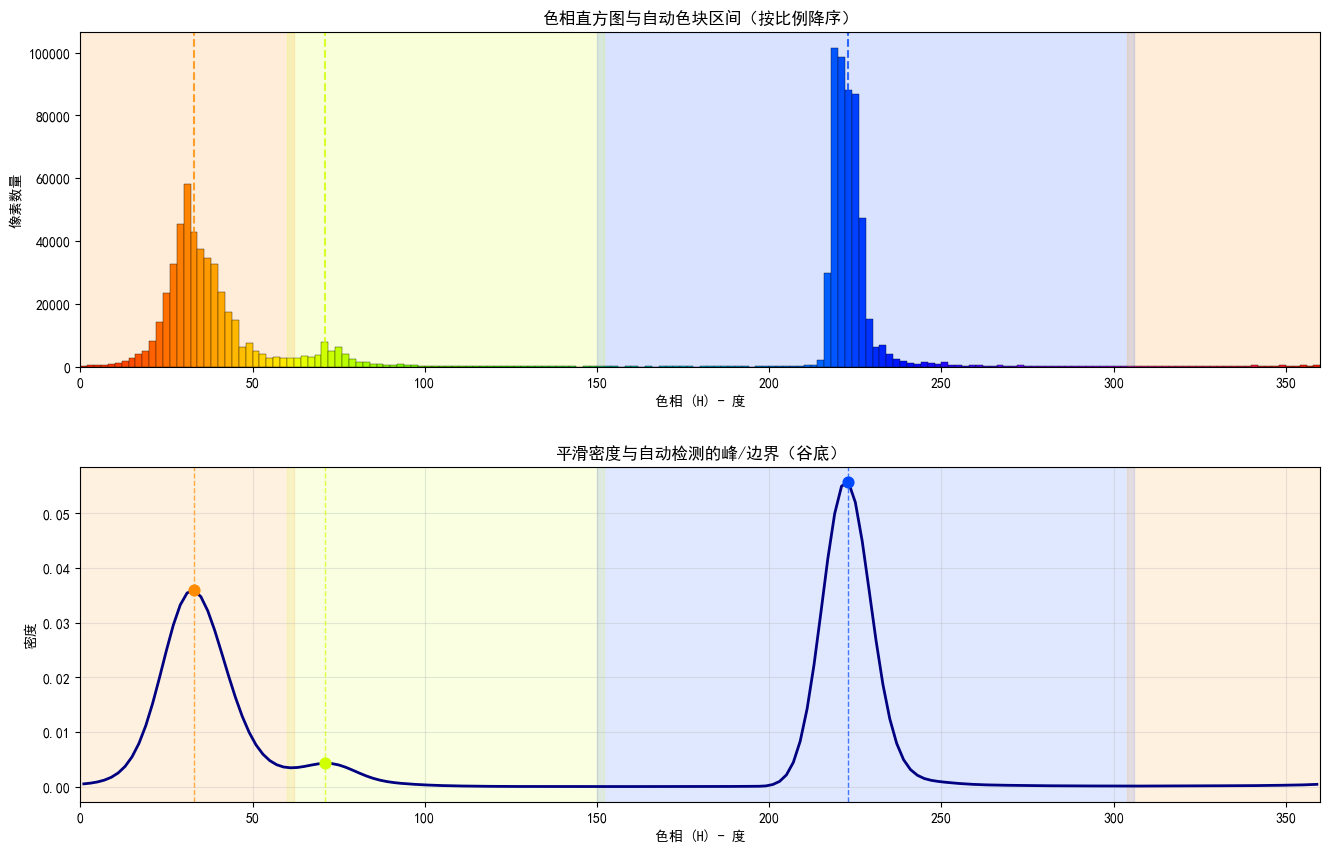

自动检测的色块区间（按像素占比降序）：
1. 中心H=223.0°, 区间[150.0°, 306.0°], 像素=505,210, 占有效彩色像素=50.79%
2. 中心H=33.0°, 区间[304.0°, 62.0°], 像素=441,781, 占有效彩色像素=44.42%
3. 中心H=71.0°, 区间[60.0°, 152.0°], 像素=50,359, 占有效彩色像素=5.06%


In [16]:
# 运行自动色块划分（基于波峰）
if 'my_img' in locals() and my_img is not None:
    result = detect_hue_blocks(
        my_img,
        min_saturation=0.1,   # 忽略灰度区域（可调）
        min_value=0.1,        # 忽略过暗区域（可调）
        bin_size_deg=2,       # 直方图分辨率（度）
        smooth_sigma_deg=6,   # 平滑强度（度）
        min_prominence_ratio=0.04,  # 峰显著性（相对最大密度）
        coverage_mode='valley',      # 使用峰间谷底作为边界，覆盖完整分布
        min_ratio=0.05               # 最小呈现阈值（如 0.05 = 5%），小于该比例的色块将被忽略
    )
    visualize_hue_blocks(result)
else:
    print('请先加载图片！')

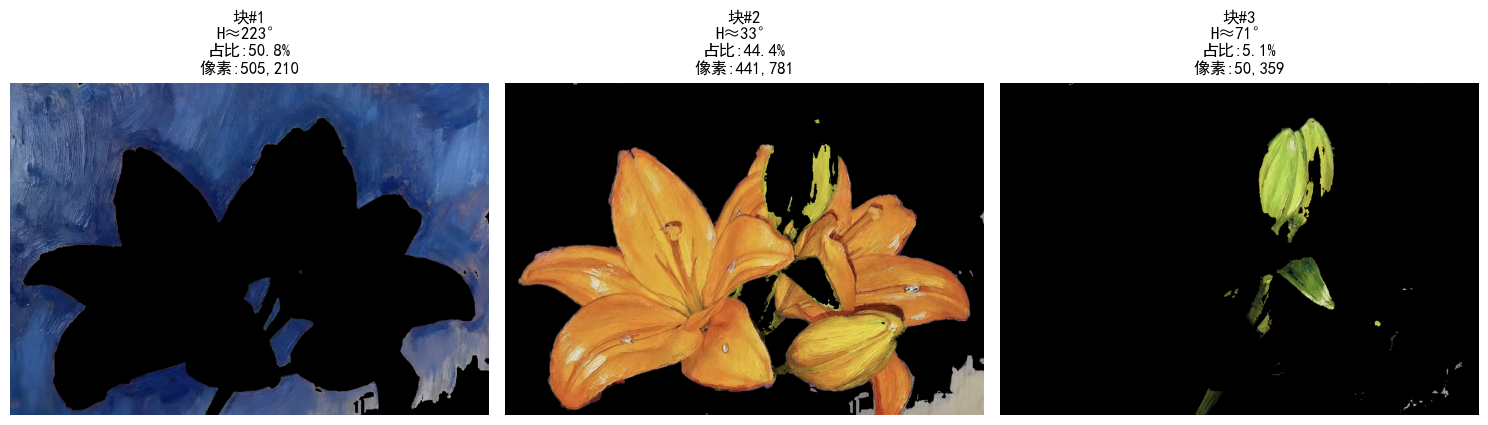

In [17]:
# 可选：根据自动检测的色块进行分割展示（已按比例降序）
if 'my_img' in locals() and my_img is not None:
    try:
        result
    except NameError:
        print('请先运行自动色块划分单元格')
    else:
        blocks = result['blocks']
        if len(blocks) == 0:
            print('根据当前参数未检测到满足 min_ratio 的色块')
        else:
            # 展示前最多6个色块（按比例降序）
            show_n = min(6, len(blocks))
            fig, axes = plt.subplots(1, show_n, figsize=(5*show_n, 4))
            if show_n == 1:
                axes = [axes]
            for i in range(show_n):
                blk = blocks[i]
                lower_h = blk['start_deg']
                upper_h = blk['end_deg']
                # 使用较宽的S/V范围覆盖整块
                mask_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2HSV)
                lower_cv = np.array([lower_h/2.0, 0.0*255, 0.0*255])
                upper_cv = np.array([upper_h/2.0, 1.0*255, 1.0*255])
                if lower_h <= upper_h:
                    mask = cv2.inRange(mask_img, lower_cv, upper_cv)
                else:
                    # 跨越0°的区间
                    mask1 = cv2.inRange(mask_img, np.array([0/2.0, 0, 0]), upper_cv)
                    mask2 = cv2.inRange(mask_img, lower_cv, np.array([360/2.0, 255, 255]))
                    mask = cv2.bitwise_or(mask1, mask2)
                result_img = cv2.bitwise_and(my_img, my_img, mask=mask)
                axes[i].imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
                axes[i].set_title(f"块#{i+1}\nH≈{blk['center_deg']:.0f}°\n占比:{blk['percentage']:.1f}%\n像素:{blk['pixel_count']:,}")
                axes[i].axis('off')
            plt.tight_layout()
            plt.show()
else:
    print('请先加载图片！')

#### 4.1 边界优化与去噪：形态学开闭 + 小连通域移除

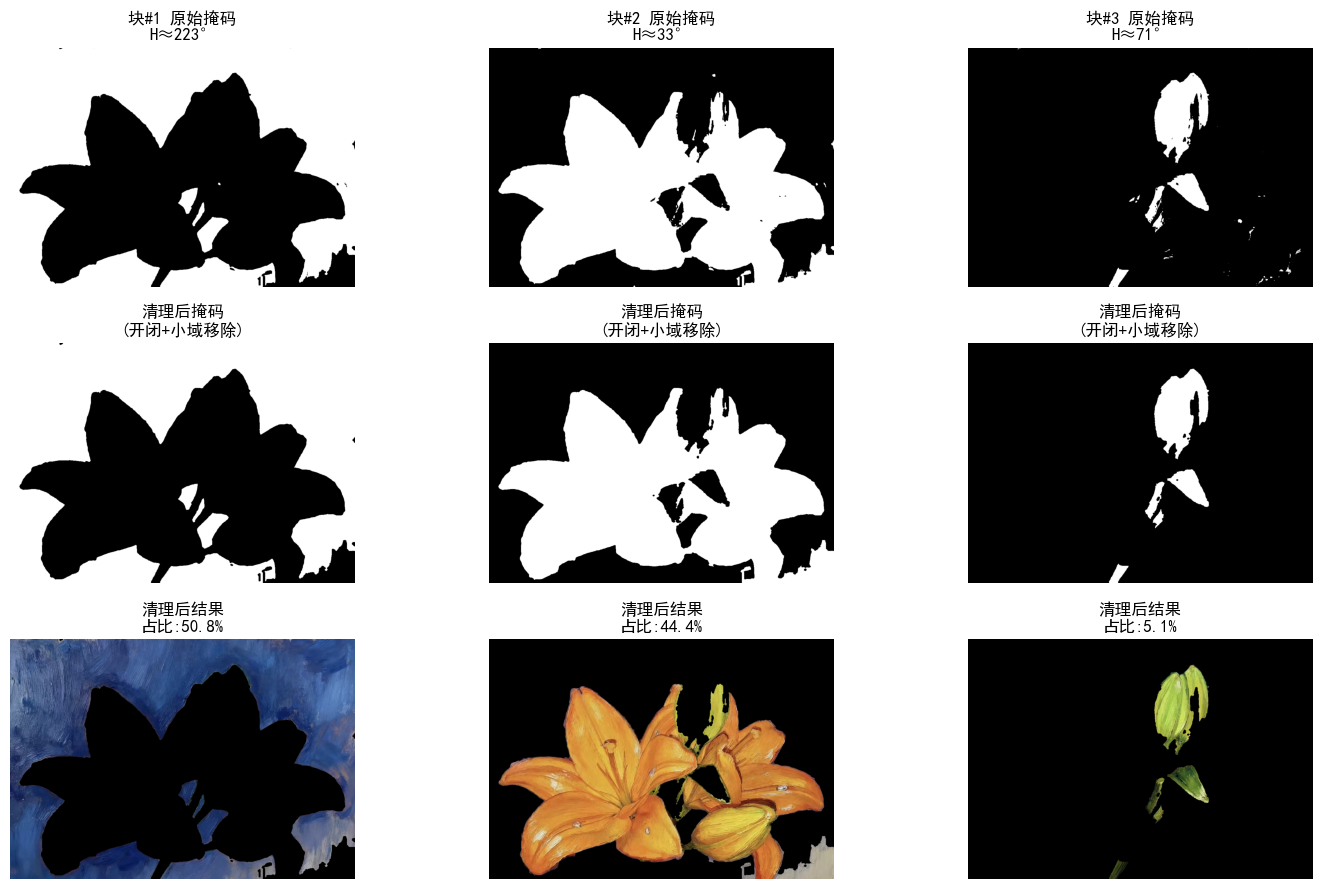

In [18]:
import cv2
import numpy as np
from typing import Tuple


def clean_mask(mask: np.ndarray,
               open_size: int = 3,
               close_size: int = 7,
               iterations_open: int = 1,
               iterations_close: int = 1,
               min_area: int = 150) -> np.ndarray:
    """
    对二值掩码做形态学开闭并移除小连通域，得到更干净、边界更清晰的区域。

    参数:
        mask: 8位单通道二值图 (0/255)
        open_size: 开运算核大小，去除小噪点（奇数，建议3~7）
        close_size: 闭运算核大小，填补小孔洞（奇数，建议5~9）
        iterations_open: 开运算迭代次数
        iterations_close: 闭运算迭代次数
        min_area: 连通域的最小面积阈值（像素），小于该值的将被移除

    返回:
        cleaned: 清理后的二值掩码
    """
    if mask is None or mask.size == 0:
        return mask
    # 形态学结构元素：椭圆核通常更平滑
    k_open = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (open_size, open_size))
    k_close = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (close_size, close_size))

    # 开运算去噪
    m1 = cv2.morphologyEx(mask, cv2.MORPH_OPEN, k_open, iterations=iterations_open)
    # 闭运算补洞
    m2 = cv2.morphologyEx(m1, cv2.MORPH_CLOSE, k_close, iterations=iterations_close)

    # 连通域筛选（移除小碎片）
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(m2, connectivity=8)
    cleaned = np.zeros_like(m2)
    for i in range(1, num_labels):  # 0是背景
        area = stats[i, cv2.CC_STAT_AREA]
        if area >= int(min_area):
            cleaned[labels == i] = 255
    return cleaned


# 演示：对自动检测到的色块掩码进行清理与边界加亮
if 'my_img' in locals() and my_img is not None:
    try:
        result
    except NameError:
        print('请先运行自动色块划分单元格（步骤4）')
    else:
        blocks = result['blocks']
        if len(blocks) == 0:
            print('根据当前参数未检测到满足 min_ratio 的色块')
        else:
            # 参数可按需调整
            open_size = 3
            close_size = 7
            iterations_open = 1
            iterations_close = 1
            min_area = max(150, int(0.0005 * (my_img.shape[0] * my_img.shape[1])))  # 自适应下限

            show_n = min(4, len(blocks))
            fig, axes = plt.subplots(3, show_n, figsize=(5*show_n, 9))
            if show_n == 1:
                axes = np.array([[axes[0]], [axes[1]], [axes[2]]])

            hsv_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2HSV)

            # 记录4.1处理后的每个色块结果，供4.2.1使用
            step41_outputs = []

            for i in range(show_n):
                blk = blocks[i]
                lower_h = blk['start_deg']
                upper_h = blk['end_deg']
                # 使用宽S/V范围以覆盖整块
                lower_cv = np.array([lower_h/2.0, 0, 0], dtype=np.float32)
                upper_cv = np.array([upper_h/2.0, 255, 255], dtype=np.float32)

                # 注意：OpenCV inRange 需要整数
                lower_cv_i = lower_cv.astype(np.uint8)
                upper_cv_i = upper_cv.astype(np.uint8)
                if lower_h <= upper_h:
                    raw_mask = cv2.inRange(hsv_img, lower_cv_i, upper_cv_i)
                else:
                    # 跨越0°的区间：拆分两段再取并集
                    mask1 = cv2.inRange(hsv_img, np.array([0, 0, 0], dtype=np.uint8), upper_cv_i)
                    mask2 = cv2.inRange(hsv_img, lower_cv_i, np.array([180, 255, 255], dtype=np.uint8))
                    raw_mask = cv2.bitwise_or(mask1, mask2)

                cleaned_mask = clean_mask(raw_mask,
                                          open_size=open_size,
                                          close_size=close_size,
                                          iterations_open=iterations_open,
                                          iterations_close=iterations_close,
                                          min_area=min_area)

                # 应用清理后的掩码
                result_img_raw = cv2.bitwise_and(my_img, my_img, mask=raw_mask)
                result_img_clean = cv2.bitwise_and(my_img, my_img, mask=cleaned_mask)

                # 保存给4.2.1使用（避免只有最后一张）
                step41_outputs.append({
                    'block_index': i,
                    'center_deg': blk['center_deg'],
                    'range': (blk['start_deg'], blk['end_deg']),
                    'cleaned_mask': cleaned_mask.copy(),
                    'result_img_clean': result_img_clean.copy(),
                })

                # 边界轮廓可视化（在清理结果上）
                contours, _ = cv2.findContours(cleaned_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                overlay = my_img.copy()
                cv2.drawContours(overlay, contours, -1, (0, 255, 0), 2)

                axes[0, i].imshow(raw_mask, cmap='gray')
                axes[0, i].set_title(f'块#{i+1} 原始掩码\nH≈{blk["center_deg"]:.0f}°')
                axes[0, i].axis('off')

                axes[1, i].imshow(cleaned_mask, cmap='gray')
                axes[1, i].set_title('清理后掩码\n(开闭+小域移除)')
                axes[1, i].axis('off')

                axes[2, i].imshow(cv2.cvtColor(result_img_clean, cv2.COLOR_BGR2RGB))
                axes[2, i].set_title(f'清理后结果\n占比:{blk["percentage"]:.1f}%')
                axes[2, i].axis('off')

            plt.tight_layout()
            plt.show()
else:
    print('请先加载图片！')

#### 4.2 暗部提取（按明度分布的分位数）

在每个分割得到的色相色块内，不用固定阈值，而是按该色块的 V（明度）分布选取最暗的百分比（例如 30%）。

方法要点：
- 将 `result_img_clean` 转为 HSV，取 V 通道。
- 在每个连通的色块区域内，计算 V 的分位数阈值（如 30% 分位）。
- 以每块各自的阈值生成暗部掩膜，并做少量形态学清理。
- 将暗部以红色高亮叠加到原色块图上以便可视化。

可调整参数：`dark_percentile`（默认 0.3）、`min_region_area`（去除小噪点）、`morph_kernel_size`（形态学开运算核大小）。

整图已保存: d:\BiDuInnovation\projects\hsv_test\4_2_blocks_dark_combined.png


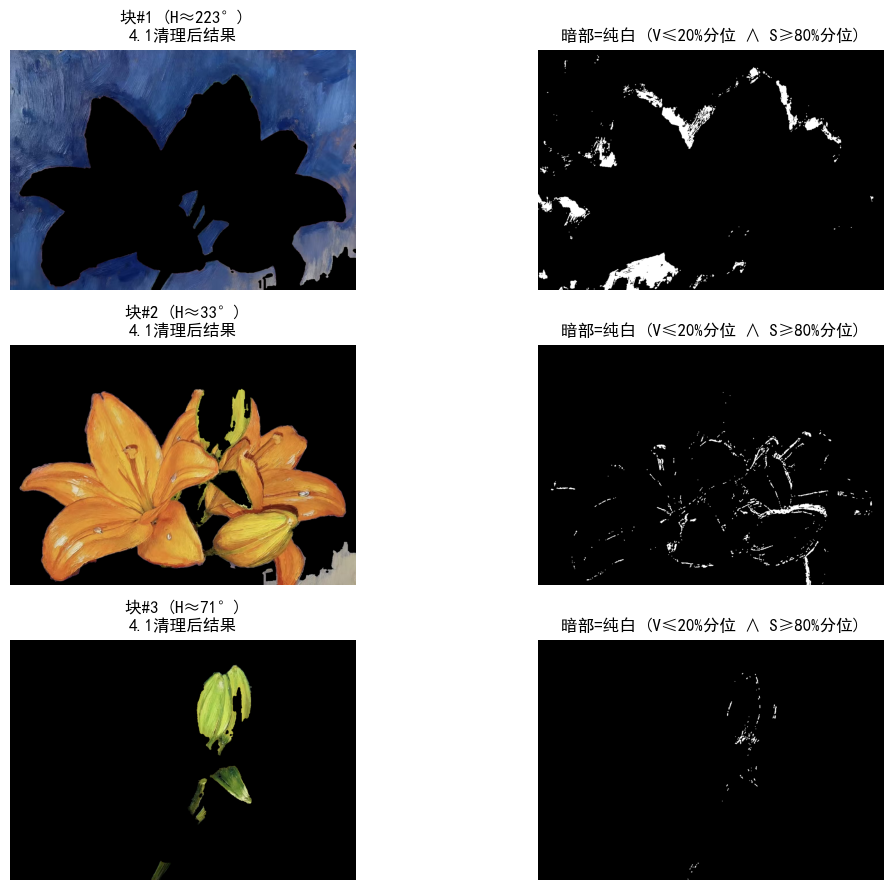

共保存 6 个子图到: d:\BiDuInnovation\projects\hsv_test （无标题、无白边、原尺寸）
块#1 阈值(前5): 1:V106.0/S174.0, 2:V75.0/S190.0, 3:V74.0/S175.0, 4:V90.0/S187.0, 5:V122.0/S136.0
块#2 阈值(前5): 1:V181.0/S191.0
块#3 阈值(前5): 1:V161.0/S160.0, 2:V76.0/S165.0, 3:V47.0/S168.0, 4:V87.0/S173.0, 5:V31.0/S196.0


In [29]:
# 依据4.1清理后的色块结果，按分位数提取“暗部”（显示每个块，暗部用纯白表示）
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import os
from typing import List, Dict


def percentile_dark_from_step41(step41_outputs: List[Dict],
                                src_bgr: np.ndarray,
                                percentile: float = 0.30,
                                s_percentile: float = 0.00,
                                morph_kernel_size: int = 3,
                                min_region_area: int = 50):
    """
    对4.1得到的每个块（cleaned_mask/result_img_clean），
    基于该块内每个连通子块的 V/S 分布，按分位数提取最暗部分。

    规则：
      - V 阈值 = 该连通域 V 的 "percentile" 分位（例如 0.30 表示最暗 30% 的上界）；
      - S 阈值 = 该连通域 S 的 "s_percentile" 分位；暗部需同时满足 S ≥ S阈值（可用于过滤灰度/低饱和暗部，默认 0.00 相当于不启用）。
        注意：将 s_percentile 设为 0.00 基本等价于不使用 S 条件。

    返回：
      - per_block: 列表，每项包含：
          {
            'block_index': int,
            'white_mask': np.ndarray (uint8, 0/255),  # 暗部=白
            'thresholds': List[(label_id, thr_v, thr_s)],  # 每个连通域的 V/S 阈值
            'preview_rgb': np.ndarray                      # 仅用于快速预览（可选）
          }
    """
    per_block = []

    hsv_full = cv2.cvtColor(src_bgr, cv2.COLOR_BGR2HSV)
    s_full = hsv_full[:, :, 1].astype(np.float32)
    v_full = hsv_full[:, :, 2].astype(np.float32)

    for item in step41_outputs:
        cleaned_mask = item['cleaned_mask']
        # 连通域：在cleaned_mask里找每个子块
        num, labels = cv2.connectedComponents((cleaned_mask > 0).astype(np.uint8), connectivity=8)

        white_mask = np.zeros_like(cleaned_mask, dtype=np.uint8)  # 暗部=255
        thresholds = []

        for lab in range(1, int(num)):
            comp_mask = (labels == lab)
            v_vals = v_full[comp_mask]
            s_vals = s_full[comp_mask]
            if v_vals.size == 0:
                continue
            thr_v = float(np.quantile(v_vals, percentile))
            # S 分位：若 s_percentile=0.00，则 thr_s 通常≈最小S，S≥thr_s 近似恒真，相当于不启用 S 约束
            thr_s = float(np.quantile(s_vals, s_percentile)) if s_vals.size > 0 else 0.0
            thresholds.append((lab, thr_v, thr_s))

            comp_dark = comp_mask & (v_full <= thr_v) & (s_full >= thr_s)

            # 形态学与面积过滤
            if morph_kernel_size and morph_kernel_size > 0:
                k = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (morph_kernel_size, morph_kernel_size))
                comp_dark = cv2.morphologyEx(comp_dark.astype(np.uint8), cv2.MORPH_OPEN, k).astype(bool)
            if int(np.count_nonzero(comp_dark)) >= int(min_region_area):
                white_mask[comp_dark] = 255

        # 预览图（可选）：原块图 + 不改变原意，仅做占位
        preview_rgb = cv2.cvtColor(item['result_img_clean'], cv2.COLOR_BGR2RGB)

        per_block.append({
            'block_index': int(item['block_index']),
            'white_mask': white_mask,
            'thresholds': thresholds,
            'preview_rgb': preview_rgb,
        })

    return per_block

# 参数
percentile = 0.2   # 最暗10%
s_percentile = 0.80 # S下限分位（0.00 表示不启用S筛选；例如 0.10 表示要求 S≥该连通域S的10%分位）
morph_kernel_size = 3
min_region_area = 50

# 运行（基于4.1的输出）
if 'step41_outputs' in locals() and isinstance(step41_outputs, list) and len(step41_outputs) > 0:
    per_block = percentile_dark_from_step41(
        step41_outputs,
        my_img,
        percentile=percentile,
        s_percentile=s_percentile,
        morph_kernel_size=morph_kernel_size,
        min_region_area=min_region_area,
    )

    # 展示：每个块两列 -> 左：4.1清理后色块 右：暗部纯白图
    n = len(per_block)
    cols = 2
    rows = n
    fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 3*rows))
    if rows == 1:
        axes = np.array([axes])

    for i, blk in enumerate(per_block):
        axes[i, 0].imshow(step41_outputs[i]['result_img_clean'][:, :, ::-1])  # BGR->RGB
        cdeg = step41_outputs[i]['center_deg']
        axes[i, 0].set_title(f'块#{step41_outputs[i]["block_index"]+1} (H≈{cdeg:.0f}°)\n4.1清理后结果')
        axes[i, 0].axis('off')

        axes[i, 1].imshow(blk['white_mask'], cmap='gray', vmin=0, vmax=255)
        axes[i, 1].set_title(f'暗部=纯白 (V≤{int(percentile*100)}%分位 ∧ S≥{int(s_percentile*100)}%分位)')
        axes[i, 1].axis('off')

    plt.tight_layout()

    # 保存整图
    base_dir = workspace_root if 'workspace_root' in globals() else os.getcwd()
    combined_path = os.path.join(base_dir, '4_2_blocks_dark_combined.png')
    try:
        fig.savefig(combined_path, dpi=200, bbox_inches='tight')
        print(f'整图已保存: {combined_path}')
    except Exception as e:
        print(f'整图保存失败: {e}')

    plt.show()

    # 分别保存每个子图（左：清理后色块；右：暗部纯白）——不带标题、无白边，与原图尺寸一致
    try:
        for i, blk in enumerate(per_block):
            block_no = int(step41_outputs[i]['block_index']) + 1
            # 左侧：直接以BGR保存，不走Matplotlib，避免边框与尺寸变化
            clean_bgr = step41_outputs[i]['result_img_clean']  # HxWx3 (BGR)
            out_path_left = os.path.join(base_dir, f'block_{block_no:02d}_clean.png')
            ok1 = cv2.imwrite(out_path_left, clean_bgr)

            # 右侧：白掩膜，0/255 单通道，尺寸与原图一致
            white_mask = blk['white_mask']  # HxW (uint8, 0/255)
            out_path_right = os.path.join(base_dir, f'block_{block_no:02d}_dark_white.png')
            ok2 = cv2.imwrite(out_path_right, white_mask)

            if not ok1 or not ok2:
                print(f'块#{block_no} 子图保存存在失败: clean({ok1}), dark({ok2})')

        print(f'共保存 {n*2} 个子图到: {base_dir} （无标题、无白边、原尺寸）')
    except Exception as e:
        print(f'子图保存失败: {e}')

    # 简要打印每块的阈值信息
    for i, blk in enumerate(per_block):
        thr_preview = ', '.join([f'{lab}:V{thr_v:.1f}/S{thr_s:.1f}' for lab, thr_v, thr_s in blk['thresholds'][:5]])
        if len(blk['thresholds']) > 5:
            thr_preview += ', ...'
        print(f"块#{step41_outputs[i]['block_index']+1} 阈值(前5): {thr_preview}")
else:
    print('未找到4.1的输出(step41_outputs)。请先运行4.1单元格。')

#### 4.3亮部提取-根据饱和度S和明度V

整图已保存: d:\BiDuInnovation\projects\hsv_test\4_3_blocks_bright_combined.png


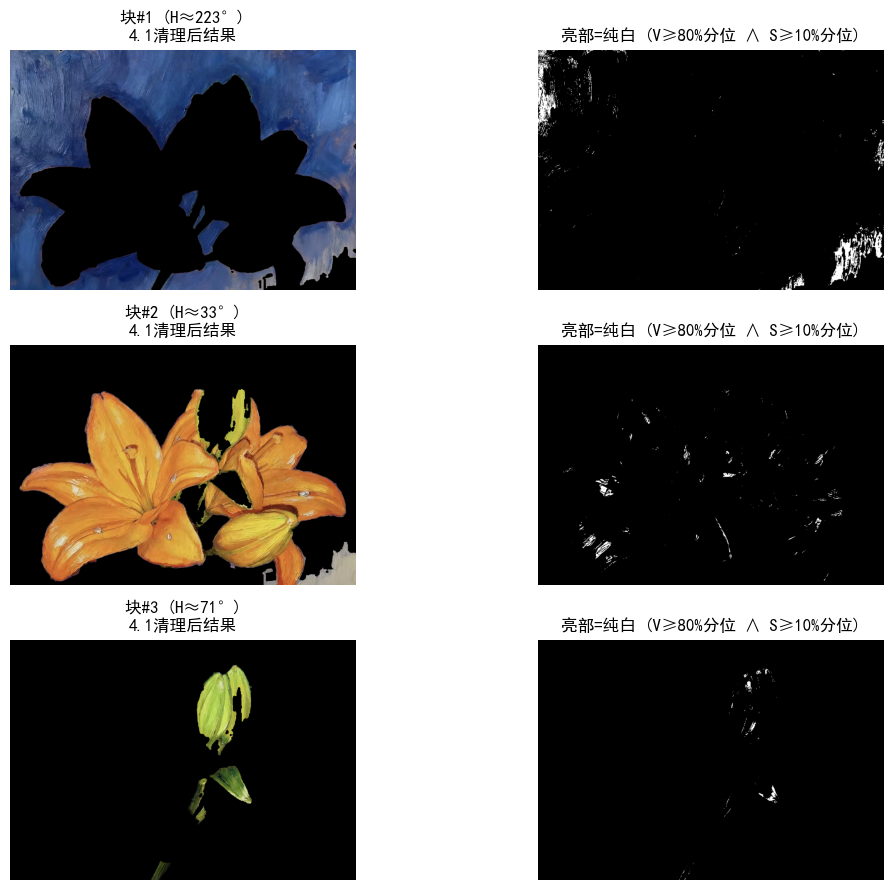

共保存 6 个子图到: d:\BiDuInnovation\projects\hsv_test （无标题、无白边、原尺寸）
块#1 阈值(前5): 1:V144.0/S94.0, 2:V103.0/S100.0, 3:V102.0/S61.0, 4:V110.0/S113.0, 5:V136.0/S29.0
块#2 阈值(前5): 1:V219.0/S137.0
块#3 阈值(前5): 1:V209.0/S128.0, 2:V152.0/S88.0, 3:V114.0/S83.0, 4:V140.0/S69.0, 5:V68.0/S86.0


In [20]:
# 4.3 亮部提取：按分位数在每个色块内基于 V 与 S 共同筛选（亮且饱和）
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from typing import List, Dict


def percentile_bright_from_step41(step41_outputs: List[Dict],
                                  src_bgr: np.ndarray,
                                  v_percentile: float = 0.70,
                                  s_percentile: float = 0.50,
                                  morph_kernel_size: int = 1,
                                  min_region_area: int = 50):
    """
    对4.1得到的每个块（cleaned_mask/result_img_clean），
    在每个连通域内计算：
      - V 的高分位阈值（如 70% 分位）用于选取“更亮”的像素；
      - S 的高分位阈值（如 50% 分位）用于选取“更饱和”的像素；
    亮部 = (V >= V阈值) 且 (S >= S阈值)。

    返回：
      - per_block: 列表，每项包含：
          {
            'block_index': int,
            'white_mask': np.ndarray (uint8, 0/255),  # 亮部=白
            'thresholds': List[(label_id, thr_v, thr_s)],  # 每个连通域的 V/S 阈值
            'preview_rgb': np.ndarray                      # 仅用于快速预览（可选）
          }
    """
    per_block = []

    hsv_full = cv2.cvtColor(src_bgr, cv2.COLOR_BGR2HSV)
    v_full = hsv_full[:, :, 2].astype(np.float32)
    s_full = hsv_full[:, :, 1].astype(np.float32)

    for item in step41_outputs:
        cleaned_mask = item['cleaned_mask']
        # 在 cleaned_mask 内找连通域
        num, labels = cv2.connectedComponents((cleaned_mask > 0).astype(np.uint8), connectivity=8)

        white_mask = np.zeros_like(cleaned_mask, dtype=np.uint8)  # 亮部=255
        thresholds = []

        for lab in range(1, int(num)):
            comp_mask = (labels == lab)
            v_vals = v_full[comp_mask]
            s_vals = s_full[comp_mask]
            if v_vals.size == 0 or s_vals.size == 0:
                continue

            thr_v = float(np.quantile(v_vals, v_percentile))
            thr_s = float(np.quantile(s_vals, s_percentile))
            thresholds.append((lab, thr_v, thr_s))

            comp_bright = comp_mask & (v_full >= thr_v) & (s_full <= thr_s)

            # 形态学与面积过滤（与4.2保持一致思路）
            if morph_kernel_size and morph_kernel_size > 0:
                k = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (morph_kernel_size, morph_kernel_size))
                comp_bright = cv2.morphologyEx(comp_bright.astype(np.uint8), cv2.MORPH_OPEN, k).astype(bool)
            if int(np.count_nonzero(comp_bright)) >= int(min_region_area):
                white_mask[comp_bright] = 255

        preview_rgb = cv2.cvtColor(item['result_img_clean'], cv2.COLOR_BGR2RGB)
        per_block.append({
            'block_index': int(item['block_index']),
            'white_mask': white_mask,
            'thresholds': thresholds,
            'preview_rgb': preview_rgb,
        })

    return per_block

# 可调参数（与4.2相似的接口）
v_percentile = 0.80   # 亮部：取 V 的第95%分位（即更亮的5%）
s_percentile = 0.10   # 饱和：取 S 的第50%分位（即更饱和的50%）
morph_kernel_size = 1
min_region_area = 10

# 运行（基于4.1的输出）
if 'step41_outputs' in locals() and isinstance(step41_outputs, list) and len(step41_outputs) > 0:
    per_block_bright = percentile_bright_from_step41(
        step41_outputs,
        my_img,
        v_percentile=v_percentile,
        s_percentile=s_percentile,
        morph_kernel_size=morph_kernel_size,
        min_region_area=min_region_area,
    )

    # 展示：每个块两列 -> 左：4.1清理后色块 右：亮部纯白图
    n = len(per_block_bright)
    cols = 2
    rows = n
    fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 3*rows))
    if rows == 1:
        axes = np.array([axes])

    for i, blk in enumerate(per_block_bright):
        axes[i, 0].imshow(step41_outputs[i]['result_img_clean'][:, :, ::-1])  # BGR->RGB
        cdeg = step41_outputs[i]['center_deg']
        axes[i, 0].set_title(f'块#{step41_outputs[i]["block_index"]+1} (H≈{cdeg:.0f}°)\n4.1清理后结果')
        axes[i, 0].axis('off')

        axes[i, 1].imshow(blk['white_mask'], cmap='gray', vmin=0, vmax=255)
        axes[i, 1].set_title(f'亮部=纯白 (V≥{int(v_percentile*100)}%分位 ∧ S≥{int(s_percentile*100)}%分位)')
        axes[i, 1].axis('off')

    plt.tight_layout()

    # 保存整图
    base_dir = workspace_root if 'workspace_root' in globals() else os.getcwd()
    combined_path = os.path.join(base_dir, '4_3_blocks_bright_combined.png')
    try:
        fig.savefig(combined_path, dpi=200, bbox_inches='tight')
        print(f'整图已保存: {combined_path}')
    except Exception as e:
        print(f'整图保存失败: {e}')

    plt.show()

    # 分别保存每个子图（左：清理后色块；右：亮部纯白）——不带标题、无白边，与原图尺寸一致
    try:
        for i, blk in enumerate(per_block_bright):
            block_no = int(step41_outputs[i]['block_index']) + 1
            # 左侧：直接以BGR保存
            clean_bgr = step41_outputs[i]['result_img_clean']  # HxWx3 (BGR)
            out_path_left = os.path.join(base_dir, f'block_{block_no:02d}_clean.png')
            ok1 = cv2.imwrite(out_path_left, clean_bgr)

            # 右侧：亮部白掩膜
            white_mask = blk['white_mask']  # HxW (uint8, 0/255)
            out_path_right = os.path.join(base_dir, f'block_{block_no:02d}_bright_white.png')
            ok2 = cv2.imwrite(out_path_right, white_mask)

            if not ok1 or not ok2:
                print(f'块#{block_no} 子图保存存在失败: clean({ok1}), bright({ok2})')

        print(f'共保存 {n*2} 个子图到: {base_dir} （无标题、无白边、原尺寸）')
    except Exception as e:
        print(f'子图保存失败: {e}')

    # 简要打印每块的 V/S 阈值信息（前5个连通域）
    for i, blk in enumerate(per_block_bright):
        thr_preview = ', '.join([f'{lab}:V{thr_v:.1f}/S{thr_s:.1f}' for lab, thr_v, thr_s in blk['thresholds'][:5]])
        if len(blk['thresholds']) > 5:
            thr_preview += ', ...'
        print(f"块#{step41_outputs[i]['block_index']+1} 阈值(前5): {thr_preview}")
else:
    print('未找到4.1的输出(step41_outputs)。请先运行4.1单元格。')

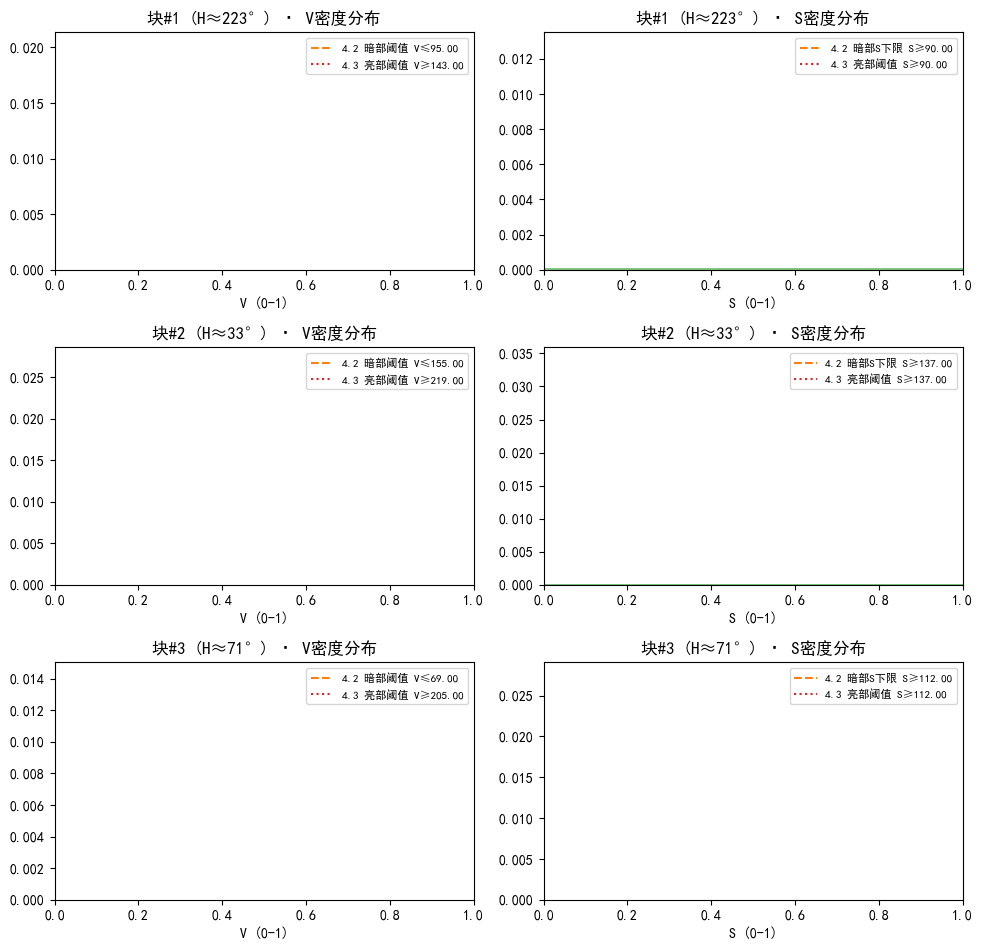

In [21]:
# 4.x 统计可视化：H固定色块内 S/V 的密度分布（用于 4.2 暗部 与 4.3 亮部）
import numpy as np
import cv2
import matplotlib.pyplot as plt
from typing import List, Dict
import math


def _safe_get(name: str, default):
    return globals()[name] if name in globals() else default


def _compute_sv_from_img(src_bgr: np.ndarray):
    hsv = cv2.cvtColor(src_bgr, cv2.COLOR_BGR2HSV)
    s_full = hsv[:, :, 1].astype(np.float32)
    v_full = hsv[:, :, 2].astype(np.float32)
    return s_full, v_full


def _plot_density(ax, vals: np.ndarray, title: str, xlabel: str, color='tab:blue', bins: int = 64, lines: list | None = None):
    ax.clear()
    if vals is None or vals.size == 0:
        ax.text(0.5, 0.5, '无数据', ha='center', va='center')
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        return
    ax.hist(vals.flatten(), bins=bins, density=True, color=color, alpha=0.6)
    if lines:
        for ln in lines:
            ax.axvline(ln['x'], color=ln.get('color', 'k'), linestyle=ln.get('ls', '--'), linewidth=1.5, label=ln.get('label'))
        # 避免重复label
        handles, labels = ax.get_legend_handles_labels()
        seen = set()
        new_handles, new_labels = [], []
        for h, l in zip(handles, labels):
            if l not in seen and l:
                new_handles.append(h)
                new_labels.append(l)
                seen.add(l)
        if new_handles:
            ax.legend(handles=new_handles, labels=new_labels, fontsize=8)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_xlim(0, 1)


def plot_sv_density_per_block(step41_outputs: List[Dict], src_bgr: np.ndarray,
                               dark_percentile: float = 0.40,
                               dark_s_percentile: float = 0.00,
                               bright_v_percentile: float = 0.70,
                               bright_s_percentile: float = 0.50,
                               bins: int = 64,
                               max_blocks: int | None = None):
    """
    对每个 4.1 的色相块（H 固定的色块：cleaned_mask==1），统计：
      - V 的密度分布，并标注：4.2 暗部阈值（V<=q_dark）与 4.3 亮部阈值（V>=q_bright）
      - S 的密度分布，并标注：4.2 暗部的 S 下限（S>=q_s_dark，可选）与 4.3 亮部阈值（S>=q_s_bright）
    注：这里的阈值以整块像素的分位数近似显示，便于直观理解（4.2/4.3 实际代码按连通域分别求阈）。
    """
    s_full, v_full = _compute_sv_from_img(src_bgr)

    n = len(step41_outputs)
    use_n = n if (max_blocks is None or max_blocks >= n) else max_blocks
    fig, axes = plt.subplots(use_n, 2, figsize=(10, 3.2 * use_n))
    if use_n == 1:
        axes = np.array([axes])

    for i in range(use_n):
        item = step41_outputs[i]
        cleaned_mask = item['cleaned_mask'].astype(bool)
        s_vals = s_full[cleaned_mask]
        v_vals = v_full[cleaned_mask]
        if s_vals.size == 0 or v_vals.size == 0:
            # 占位
            _plot_density(axes[i, 0], np.array([]), f'块#{item.get("block_index", i)+1} V分布', 'V (0-1)')
            _plot_density(axes[i, 1], np.array([]), f'块#{item.get("block_index", i)+1} S分布', 'S (0-1)')
            continue
        # 分位数（以整块像素为单位）
        v_thr_dark = float(np.quantile(v_vals, dark_percentile)) if 0 <= dark_percentile <= 1 else None
        v_thr_bright = float(np.quantile(v_vals, bright_v_percentile)) if 0 <= bright_v_percentile <= 1 else None
        s_thr_dark = float(np.quantile(s_vals, dark_s_percentile)) if 0 <= dark_s_percentile <= 1 else None
        s_thr_bright = float(np.quantile(s_vals, bright_s_percentile)) if 0 <= bright_s_percentile <= 1 else None
        # H中心角度
        cdeg = item.get('center_deg', None)
        title_prefix = f"块#{int(item.get('block_index', i))+1}" + (f" (H≈{cdeg:.0f}°)" if cdeg is not None else '')
        # V 分布：标注暗部和亮部阈值
        v_lines = []
        if v_thr_dark is not None:
            v_lines.append({'x': v_thr_dark, 'color': 'tab:orange', 'ls': '--', 'label': f'4.2 暗部阈值 V≤{v_thr_dark:.2f}'})
        if v_thr_bright is not None:
            v_lines.append({'x': v_thr_bright, 'color': 'tab:red', 'ls': ':', 'label': f'4.3 亮部阈值 V≥{v_thr_bright:.2f}'})
        _plot_density(axes[i, 0], v_vals, f'{title_prefix} · V密度分布', 'V (0-1)', color='tab:blue', bins=bins, lines=v_lines)
        # S 分布：标注暗部/亮部的 S 阈值
        s_lines = []
        if s_thr_dark is not None and dark_s_percentile > 0:
            s_lines.append({'x': s_thr_dark, 'color': 'tab:orange', 'ls': '--', 'label': f'4.2 暗部S下限 S≥{s_thr_dark:.2f}'})
        if s_thr_bright is not None:
            s_lines.append({'x': s_thr_bright, 'color': 'tab:red', 'ls': ':', 'label': f'4.3 亮部阈值 S≥{s_thr_bright:.2f}'})
        _plot_density(axes[i, 1], s_vals, f'{title_prefix} · S密度分布', 'S (0-1)', color='tab:green', bins=bins, lines=s_lines)

    plt.tight_layout()
    plt.show()

# 读取现有参数，若不存在则使用默认值
dark_pct = _safe_get('percentile', 0.40)            # 4.2 用的 V 分位
s_dark_pct = _safe_get('s_percentile', 0.00)        # 4.2 用的 S 分位（下限），0.00 表示不启用
v_bright_pct = _safe_get('v_percentile', 0.70)     # 4.3 用的 V 分位
s_bright_pct = _safe_get('s_percentile', 0.50)     # 4.3 用的 S 分位
src_img = _safe_get('my_img', None)
if src_img is None and 'img_bgr' in globals():
    src_img = img_bgr

if 'step41_outputs' in globals() and isinstance(step41_outputs, list) and len(step41_outputs) > 0 and src_img is not None:
    plot_sv_density_per_block(step41_outputs, src_img,
                               dark_percentile=float(dark_pct),
                               dark_s_percentile=float(s_dark_pct),
                               bright_v_percentile=float(v_bright_pct),
                               bright_s_percentile=float(s_bright_pct),
                               bins=64)
else:
    print('未找到 4.1 的输出 step41_outputs 或原图 my_img。请先运行 4.1 单元，确保已得到 cleaned_mask。')